### Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Import the dataset

In [2]:
df = pd.read_csv('chinese debt trap all over the world. - projects.csv')
df.head()

,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,$50M,CDB,Government,Transport,None Known,Angola
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,$7.0B,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil
2,1000 housing project,2012,$47M,ExImBank,Government,Government,None Known,Suriname
3,115kV Transmission Line and Substation from Ph...,2009,$475M,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia
4,151 Multisector infrastructure projects,2016,$600M,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya


In [3]:
df.shape

(858, 8)

**1. The given data has 8 columns and it has data for 858 loans.**

**2. The 'YEAR' column indicates the year in which the loan was taken.**

**3. The 'AMOUNT' column has the amount of loan taken in millions or billions.**

**4. The 'LENDER' column indicates the bank from China which has given the loan.**

**5. The 'BORROWER' column indicates who has taken the loan, it can be the Government or any private company.**

**6. The 'SECTOR' column indicates the sector for which the loan was taken.**

**7. The 'COUNTRY' column indicates the country which has taken the loan.**

**8. 'Expand All | Collapse All' and 'SENSITIVE TERRITORY OVERLAP' columns need to be studied in detail.**

### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Expand All | Collapse All    858 non-null    object
 1   YEAR                         858 non-null    int64 
 2   AMOUNT                       858 non-null    object
 3   LENDER                       858 non-null    object
 4   BORROWER                     857 non-null    object
 5   SECTOR                       858 non-null    object
 6   SENSITIVE TERRITORY OVERLAP  858 non-null    object
 7   Country                      858 non-null    object
dtypes: int64(1), object(7)
memory usage: 30.2+ KB


In [5]:
df.isna().sum()

Expand All | Collapse All      0
YEAR                           0
AMOUNT                         0
LENDER                         0
BORROWER                       1
SECTOR                         0
SENSITIVE TERRITORY OVERLAP    0
Country                        0
dtype: int64

There is a null value 'BORROWER' column.
So, the best option is to drop entire rows consisting of null values.

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

Expand All | Collapse All      0
YEAR                           0
AMOUNT                         0
LENDER                         0
BORROWER                       0
SECTOR                         0
SENSITIVE TERRITORY OVERLAP    0
Country                        0
dtype: int64

When we drop a particular row, we miss a particular index in our dataframe.
So we will modify the index of our dataframe by assigning a array of serial numbers to it.

In [8]:
df.index = np.arange(857)
df

,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,$50M,CDB,Government,Transport,None Known,Angola
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,$7.0B,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil
2,1000 housing project,2012,$47M,ExImBank,Government,Government,None Known,Suriname
3,115kV Transmission Line and Substation from Ph...,2009,$475M,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia
4,151 Multisector infrastructure projects,2016,$600M,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya
...,...,...,...,...,...,...,...,...
852,Zalingei-El Geneinah Road Construction,2009,$120M,ExImBank,Government,Transport,None Known,Sudan
853,Zanzibar Airport Terminal 2 Expansion,2010,$73M,ExImBank,Government,Transport,None Known,Tanzania
854,Zemun-Borca bridge,2009,$217M,ExImBank,Government,Transport,None Known,Serbia
855,Zongo II Hydropower Station,2011,$367M,ExImBank,Government,Power,None Known,"Congo, Democratic Republic of the"


### Pre-Processing

In [9]:
df['AMOUNT']

0       $50M
1      $7.0B
2       $47M
3      $475M
4      $600M
       ...  
852    $120M
853     $73M
854    $217M
855    $367M
856    $984M
Name: AMOUNT, Length: 857, dtype: object

All the values in 'AMOUNT' column are strings.
We need to convert all the values into numbers so we can plot them and draw inferences.

In [10]:
y = []
for i in df['AMOUNT']:
    i = i.replace('$', '')
    if 'B' in i:
        i = i.replace('B', '')
        i = float(i) * 1000
        
    elif 'M' in i:
        i = i.replace('M', '')
        i = float(i) 
        
    y.append(i)
y[0:5]

[50.0, 7000.0, 47.0, 475.0, 600.0]

In [11]:
df['AMOUNT'] = y
df.head()

,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,50.0,CDB,Government,Transport,None Known,Angola
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,7000.0,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil
2,1000 housing project,2012,47.0,ExImBank,Government,Government,None Known,Suriname
3,115kV Transmission Line and Substation from Ph...,2009,475.0,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia
4,151 Multisector infrastructure projects,2016,600.0,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya


In [12]:
type(df['AMOUNT'][1])

numpy.float64

Let's see the column Expand All | Collapse All

In [13]:
len(df['Expand All | Collapse All'].unique())

827

As we have seen there are 827 unique values for 'Expand All | Collapse All' and the length of the dataframe is 857.
So this feature is not useful for us.
We have to drop it.

In [14]:
df.drop('Expand All | Collapse All', axis=1, inplace=True)
df.head()

,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,2011,50.0,CDB,Government,Transport,None Known,Angola
1,2009,7000.0,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil
2,2012,47.0,ExImBank,Government,Government,None Known,Suriname
3,2009,475.0,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia
4,2016,600.0,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya


Now let's see the unique values for 'LENDER' column

In [15]:
df['LENDER'].unique()

array(['CDB', 'ExImBank', 'CDB, ExImBank', 'BOC, CDB, ExImBank',
       'CDB, ICBC', 'CDB, others', 'CDB, Citic'], dtype=object)

In [16]:
len(df['LENDER'].unique())

7

In [17]:
c = []
d = []
for i in df['LENDER']:
    c = i.split(',')
    d.append(c)
    
d[220:250]

[['ExImBank'],
 ['ExImBank'],
 ['ExImBank'],
 ['ExImBank'],
 ['CDB'],
 ['ExImBank'],
 ['ExImBank'],
 ['ExImBank'],
 ['ExImBank'],
 ['ExImBank'],
 ['ExImBank'],
 ['ExImBank'],
 ['ExImBank'],
 ['ExImBank'],
 ['ExImBank'],
 ['ExImBank'],
 ['ExImBank'],
 ['ExImBank'],
 ['ExImBank'],
 ['BOC', ' CDB', ' ExImBank'],
 ['ExImBank'],
 ['ExImBank'],
 ['ExImBank'],
 ['ExImBank'],
 ['ExImBank'],
 ['ExImBank'],
 ['ExImBank'],
 ['ExImBank'],
 ['CDB'],
 ['CDB']]

In [18]:
df['LENDER'] = d
df.head()

,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,2011,50.0,[CDB],Government,Transport,None Known,Angola
1,2009,7000.0,[CDB],Petrobras,"Extraction, pipelines",None Known,Brazil
2,2012,47.0,[ExImBank],Government,Government,None Known,Suriname
3,2009,475.0,[ExImBank],Electricite Du Cambodge,Power,None Known,Cambodia
4,2016,600.0,[CDB],Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya


We can use MultiLabelBinarizer, it creates new columns for unique values but unlike One Hot Encoding.

MultiLabelBinarizer appends 1 to the respective column if that value is present and 0 if that value is absent for that particular row.

MulitLabelBinarizer will append 1 to CDB and also 1 to ExImBank if that value in 'LENDER' is 'CDB,ExImBank'

In [19]:
from sklearn.preprocessing import MultiLabelBinarizer

In [20]:
mlb = MultiLabelBinarizer()

In [21]:
df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('LENDER')), index=df.index, columns = mlb.classes_))
df.head()

,YEAR,AMOUNT,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,CDB,Citic,ExImBank,ICBC,others,BOC,CDB,ExImBank
0,2011,50.0,Government,Transport,None Known,Angola,0,0,0,0,0,0,1,0
1,2009,7000.0,Petrobras,"Extraction, pipelines",None Known,Brazil,0,0,0,0,0,0,1,0
2,2012,47.0,Government,Government,None Known,Suriname,0,0,0,0,0,0,0,1
3,2009,475.0,Electricite Du Cambodge,Power,None Known,Cambodia,0,0,0,0,0,0,0,1
4,2016,600.0,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya,0,0,0,0,0,0,1,0


MultiLabelBinarizer has created new columns for the unique values in the lists

In [22]:
df.columns

Index(['YEAR', 'AMOUNT', 'BORROWER', 'SECTOR', 'SENSITIVE TERRITORY OVERLAP',
       'Country', ' CDB', ' Citic', ' ExImBank', ' ICBC', ' others', 'BOC',
       'CDB', 'ExImBank'],
      dtype='object')

In [23]:
for i in range(len(df)):
    if df.loc[i,' CDB'] == 1:
        df.loc[i,'CDB'] = 1
    if df.loc[i,' ExImBank'] == 1:
        df.loc[i,'ExImBank'] = 1
df.head()

,YEAR,AMOUNT,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,CDB,Citic,ExImBank,ICBC,others,BOC,CDB,ExImBank
0,2011,50.0,Government,Transport,None Known,Angola,0,0,0,0,0,0,1,0
1,2009,7000.0,Petrobras,"Extraction, pipelines",None Known,Brazil,0,0,0,0,0,0,1,0
2,2012,47.0,Government,Government,None Known,Suriname,0,0,0,0,0,0,0,1
3,2009,475.0,Electricite Du Cambodge,Power,None Known,Cambodia,0,0,0,0,0,0,0,1
4,2016,600.0,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya,0,0,0,0,0,0,1,0


In [24]:
df[df[' CDB'] == 1]

,YEAR,AMOUNT,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,CDB,Citic,ExImBank,ICBC,others,BOC,CDB,ExImBank
239,2017,690.0,Egyptian Electricity Transmission Company,Power,Within Indigenous Peoples' Lands\n Within Crit...,Egypt,1,0,1,0,0,1,1,1


In [25]:
df.drop(columns = [' CDB', ' ExImBank'], axis = 1, inplace = True)
df.head(5)

,YEAR,AMOUNT,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,Citic,ICBC,others,BOC,CDB,ExImBank
0,2011,50.0,Government,Transport,None Known,Angola,0,0,0,0,1,0
1,2009,7000.0,Petrobras,"Extraction, pipelines",None Known,Brazil,0,0,0,0,1,0
2,2012,47.0,Government,Government,None Known,Suriname,0,0,0,0,0,1
3,2009,475.0,Electricite Du Cambodge,Power,None Known,Cambodia,0,0,0,0,0,1
4,2016,600.0,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya,0,0,0,0,1,0


The duplicate columns are dropped.

In [26]:
for i in range(6, 12):
    print(df.iloc[:, i].sum())

1
2
1
1
232
634


As we can see the last 2 columns have the highest sum.

The last 2 columns are for 'CDB' and 'ExImBank' and they have given out significant number of loans.

Citic, ICBC, BOC have given out very less loans. So we can consider these columns as others.

In [27]:
for i in range(len(df)):
    if df.loc[i, 'BOC'] == 1:
        df.loc[i,' others'] = 1
    if df.loc[i, ' Citic'] == 1:
        df.loc[i,' others'] = 1
    if df.loc[i, ' ICBC'] == 1:
        df.loc[i,' others'] = 1
df.head(5)

,YEAR,AMOUNT,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,Citic,ICBC,others,BOC,CDB,ExImBank
0,2011,50.0,Government,Transport,None Known,Angola,0,0,0,0,1,0
1,2009,7000.0,Petrobras,"Extraction, pipelines",None Known,Brazil,0,0,0,0,1,0
2,2012,47.0,Government,Government,None Known,Suriname,0,0,0,0,0,1
3,2009,475.0,Electricite Du Cambodge,Power,None Known,Cambodia,0,0,0,0,0,1
4,2016,600.0,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya,0,0,0,0,1,0


In [28]:
df[df[' Citic'] == 1]

,YEAR,AMOUNT,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,Citic,ICBC,others,BOC,CDB,ExImBank
783,2010,273.0,Government,Transport,None Known,Argentina,1,0,1,0,1,0


Now we can drop ' Citic', 'ICBC' and ' BOC' columns.

In [29]:
df.drop(columns = [' Citic', ' ICBC', 'BOC'], axis = 1, inplace = True)
df.head(5)

,YEAR,AMOUNT,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,others,CDB,ExImBank
0,2011,50.0,Government,Transport,None Known,Angola,0,1,0
1,2009,7000.0,Petrobras,"Extraction, pipelines",None Known,Brazil,0,1,0
2,2012,47.0,Government,Government,None Known,Suriname,0,0,1
3,2009,475.0,Electricite Du Cambodge,Power,None Known,Cambodia,0,0,1
4,2016,600.0,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya,0,1,0


Let us rename the newly created columns for better understanding.

In [30]:
df.rename(columns = {' others':'Lender_Others', 'CDB':'Lender_CDB', 'ExImBank':'Lender_Eximbank'}, inplace = True)
df.head()

,YEAR,AMOUNT,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,Lender_Others,Lender_CDB,Lender_Eximbank
0,2011,50.0,Government,Transport,None Known,Angola,0,1,0
1,2009,7000.0,Petrobras,"Extraction, pipelines",None Known,Brazil,0,1,0
2,2012,47.0,Government,Government,None Known,Suriname,0,0,1
3,2009,475.0,Electricite Du Cambodge,Power,None Known,Cambodia,0,0,1
4,2016,600.0,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya,0,1,0


In [31]:
df.rename(columns= {'YEAR': 'Year','AMOUNT':'Amount', 'BORROWER':'Borrower','SECTOR':'Sector','SENSITIVE TERRITORY OVERLAP':'Territory_overlap'}, inplace = True)
df.head()

,Year,Amount,Borrower,Sector,Territory_overlap,Country,Lender_Others,Lender_CDB,Lender_Eximbank
0,2011,50.0,Government,Transport,None Known,Angola,0,1,0
1,2009,7000.0,Petrobras,"Extraction, pipelines",None Known,Brazil,0,1,0
2,2012,47.0,Government,Government,None Known,Suriname,0,0,1
3,2009,475.0,Electricite Du Cambodge,Power,None Known,Cambodia,0,0,1
4,2016,600.0,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya,0,1,0


Now let us perform transformations on column 'Sector'.

In [32]:
df['Sector'].unique()

array(['Transport', 'Extraction, pipelines', 'Government', 'Power',
       'Mulit-sector/discretionary', 'Telecom', 'Other construction',
       'Agriculture, food', 'Manufacturing', 'fTransport'], dtype=object)

In [33]:
df['Sector'].value_counts()

Transport                     316
Power                         203
Government                    138
Telecom                        63
Extraction, pipelines          38
Mulit-sector/discretionary     30
Other construction             29
Agriculture, food              27
Manufacturing                  12
fTransport                      1
Name: Sector, dtype: int64

Here fTransport has only one value. So we can add that value to Transport.

We also can rename Extraction, pipelines to 'extraction and pipelines' and 'Agriculture, food' to 'agriculture and food'.

'Multi-sector/discretionary' can be renamed to 'Multisector and discretionary'.

In [34]:
df['Sector'] = df['Sector'].str.replace('fTransport','Transport')
df['Sector'] = df['Sector'].str.replace('Extraction, pipelines','Extraction and Pipelines')
df['Sector'] = df['Sector'].str.replace('Agriculture, food','Agricultiure and Food')
df['Sector'] = df['Sector'].str.replace('/discretionary',' and discretionary')

In [35]:
df['Sector'].value_counts()

Transport                         317
Power                             203
Government                        138
Telecom                            63
Extraction and Pipelines           38
Mulit-sector and discretionary     30
Other construction                 29
Agricultiure and Food              27
Manufacturing                      12
Name: Sector, dtype: int64

Now the 'Sector' column is readable and can be plotted in graphs.

Now let's see the 'Borrower' column.

In [36]:
len(df['Borrower'].unique())

120

In [37]:
df['Borrower'].unique()

array(['Government', 'Petrobras', 'Electricite Du Cambodge',
       'Central Bank of Kenya', 'Electicite du Laos (EdL)',
       'Electicite du Laos (EdL) & Norinco (SOE) Joint Venture',
       'National Irrigation Administration', 'Ministry of Cooperatives',
       'Attarat Power Company (APCO)', 'NPPMCL',
       'PT Huadian Bukit Asam Power',
       'Bangladesh Chemical Industries Corporation',
       'Bases Conversion Development Authority (BCDA)', 'Galaxy Backbone',
       'KazMunayGas', 'Goverment', 'PT Intraco Penta and PowerChina',
       'African Export-Import Bank', 'Central Bank of Egypt',
       'African Export Import Bank', 'Sinohydro & CREC (75%)',
       'Togo Telecom', 'Sumber Segara Primadaya',
       'JAKS, China Power Engineering Consulting Group Co Ltd (CPECC)',
       'Maldives Airports Company Limited', 'Shanghai Construction Group',
       'Camtel', 'Corporacion Venezolana de Guayana (CVG)',
       'Petroecuador', 'Go', 'Housing Development Corporation',
       'Co

In [38]:
df['Borrower'].value_counts()

Government                                                                    677
Perusahaan Listrik Negara (PLN)                                                12
Petroecuador                                                                    7
Petróleos de Venezuela, S.A. (PDVSA)                                            6
Petrobras                                                                       5
                                                                             ... 
State Electric Company                                                          1
Bangladesh Petroleum Corporation                                                1
Uzbekneftegaz                                                                   1
Azcuba                                                                          1
Electicite du Laos (EdL) & China International Water & Electric Corp (CWE)      1
Name: Borrower, Length: 120, dtype: int64

As we have seen 'Government has the highest value counts.

But that is not all, in unique values there are some spelling mistakes like, Government is spelled as 'Goverment'.

Then there are local governments like ' Madang Provincial Govt.', 'Buenos Aires local government','Government of Punjab'.

Let us make a new column which will only tell us if the borrower is the government of the country or no.

We will then drop the borrower column

In [39]:
for i in range(len(df)):
    if ('Government' in df.loc[i,'Borrower']) or ('Goverment' in df.loc[i,'Borrower']) or ('Govt.' in df.loc[i,'Borrower']):
        df.loc[i,'Borrower_Gov'] = 1
    else:
        df.loc[i,'Borrower_Gov'] = 0

In [40]:
df['Borrower_Gov'].value_counts()

1.0    681
0.0    176
Name: Borrower_Gov, dtype: int64

In [41]:
df.drop('Borrower', inplace=True, axis=1)
df.head()

,Year,Amount,Sector,Territory_overlap,Country,Lender_Others,Lender_CDB,Lender_Eximbank,Borrower_Gov
0,2011,50.0,Transport,None Known,Angola,0,1,0,1.0
1,2009,7000.0,Extraction and Pipelines,None Known,Brazil,0,1,0,0.0
2,2012,47.0,Government,None Known,Suriname,0,0,1,1.0
3,2009,475.0,Power,None Known,Cambodia,0,0,1,0.0
4,2016,600.0,Mulit-sector and discretionary,None Known,Kenya,0,1,0,0.0


Now let's see the 'Territory_overlap' column. 

In [42]:
df['Territory_overlap'].unique()

array(['None Known',
       "Within Indigenous Peoples' Lands\n Within Critical Habitats",
       "Within Indigenous Peoples' Lands",
       "Within Indigenous Peoples' Lands\n Within National Protected Areas",
       'Within Critical Habitats\n Within National Protected Areas',
       'Within Critical Habitats',
       "Within Indigenous Peoples' Lands\n Within Critical Habitats\n Within National Protected Areas",
       'Within National Protected Areas'], dtype=object)

In [43]:
len(df['Territory_overlap'].unique())

8

In [44]:
df['Territory_overlap'].value_counts()

None Known                                                                                       524
Within Critical Habitats                                                                         124
Within Critical Habitats\n Within National Protected Areas                                        57
Within Indigenous Peoples' Lands\n Within Critical Habitats                                       45
Within Indigenous Peoples' Lands                                                                  41
Within Indigenous Peoples' Lands\n Within Critical Habitats\n Within National Protected Areas     34
Within National Protected Areas                                                                   19
Within Indigenous Peoples' Lands\n Within National Protected Areas                                13
Name: Territory_overlap, dtype: int64

Looking at the unique values, there are 8 unique values.

But the 8 values are just combination of 4 values which are none, critical, indegenous and protected.

In [45]:
list1 = ['None', 'Critical', 'Indigenous', 'National']

for i in range(len(list1)):
    for j in range(len(df)):
        if list1[i] in df.loc[j, 'Territory_overlap']:
            df.loc[j, 'ST_' + list1[i]] = 1
        else:
            df.loc[j, 'ST_' + list1[i]] = 0

In [46]:
df.head()

,Year,Amount,Sector,Territory_overlap,Country,Lender_Others,Lender_CDB,Lender_Eximbank,Borrower_Gov,ST_None,ST_Critical,ST_Indigenous,ST_National
0,2011,50.0,Transport,None Known,Angola,0,1,0,1.0,1.0,0.0,0.0,0.0
1,2009,7000.0,Extraction and Pipelines,None Known,Brazil,0,1,0,0.0,1.0,0.0,0.0,0.0
2,2012,47.0,Government,None Known,Suriname,0,0,1,1.0,1.0,0.0,0.0,0.0
3,2009,475.0,Power,None Known,Cambodia,0,0,1,0.0,1.0,0.0,0.0,0.0
4,2016,600.0,Mulit-sector and discretionary,None Known,Kenya,0,1,0,0.0,1.0,0.0,0.0,0.0


In [47]:
df[df['Territory_overlap'] == "Within Indigenous Peoples' Lands\n Within Critical Habitats\n Within National Protected Areas"].head(3)

,Year,Amount,Sector,Territory_overlap,Country,Lender_Others,Lender_CDB,Lender_Eximbank,Borrower_Gov,ST_None,ST_Critical,ST_Indigenous,ST_National
38,2013,220.0,Transport,Within Indigenous Peoples' Lands\n Within Crit...,Ethiopia,0,0,1,1.0,0.0,1.0,1.0,1.0
39,2013,981.0,Transport,Within Indigenous Peoples' Lands\n Within Crit...,Ethiopia,0,0,1,1.0,0.0,1.0,1.0,1.0
40,2013,1300.0,Transport,Within Indigenous Peoples' Lands\n Within Crit...,Ethiopia,0,0,1,1.0,0.0,1.0,1.0,1.0


In [48]:
df.drop('Territory_overlap', axis = 1, inplace = True)

In [49]:
df.head()

,Year,Amount,Sector,Country,Lender_Others,Lender_CDB,Lender_Eximbank,Borrower_Gov,ST_None,ST_Critical,ST_Indigenous,ST_National
0,2011,50.0,Transport,Angola,0,1,0,1.0,1.0,0.0,0.0,0.0
1,2009,7000.0,Extraction and Pipelines,Brazil,0,1,0,0.0,1.0,0.0,0.0,0.0
2,2012,47.0,Government,Suriname,0,0,1,1.0,1.0,0.0,0.0,0.0
3,2009,475.0,Power,Cambodia,0,0,1,0.0,1.0,0.0,0.0,0.0
4,2016,600.0,Mulit-sector and discretionary,Kenya,0,1,0,0.0,1.0,0.0,0.0,0.0


This completes our preprocessing.

Next we have to do visualisations and draw inferences from our data.

### Visualizations

First, let us plot a histogram for the amount of loans taken. 

<AxesSubplot:xlabel='Amount', ylabel='Count'>

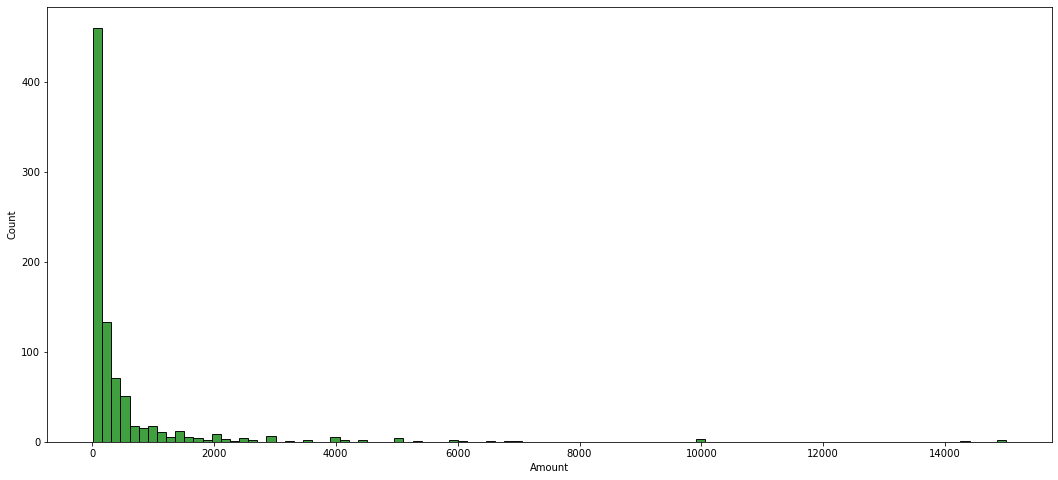

In [50]:
plt.figure(figsize=(18,8))
sns.histplot(data=df, x = 'Amount', bins=100, color='Green')

<AxesSubplot:xlabel='Amount', ylabel='Count'>

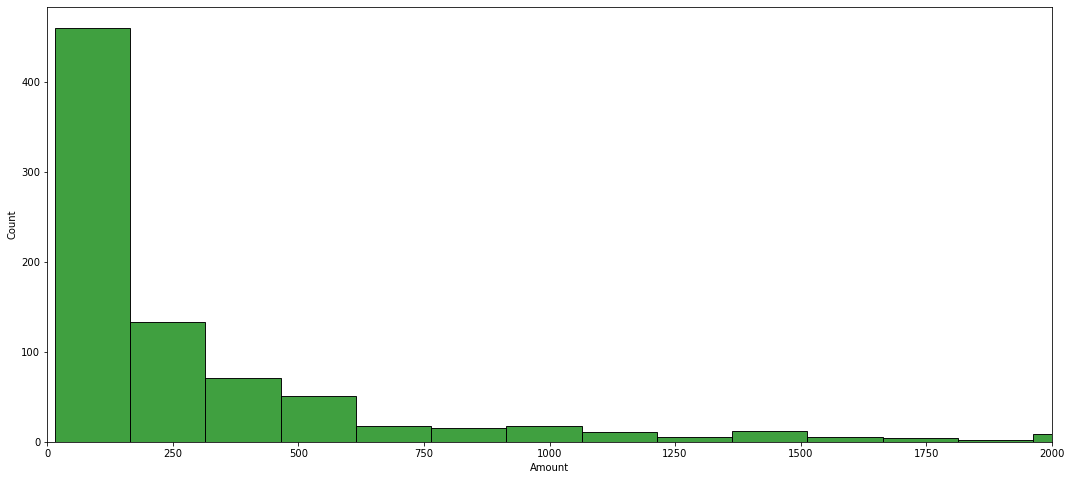

In [51]:
plt.figure(figsize=(18,8))
g = sns.histplot(data=df, x = 'Amount', bins=100, color='Green')
g.set(xlim = (0, 2000))
g

Next, let us see how much amount of loans were taken in any year.

<AxesSubplot:xlabel='Year', ylabel='count'>

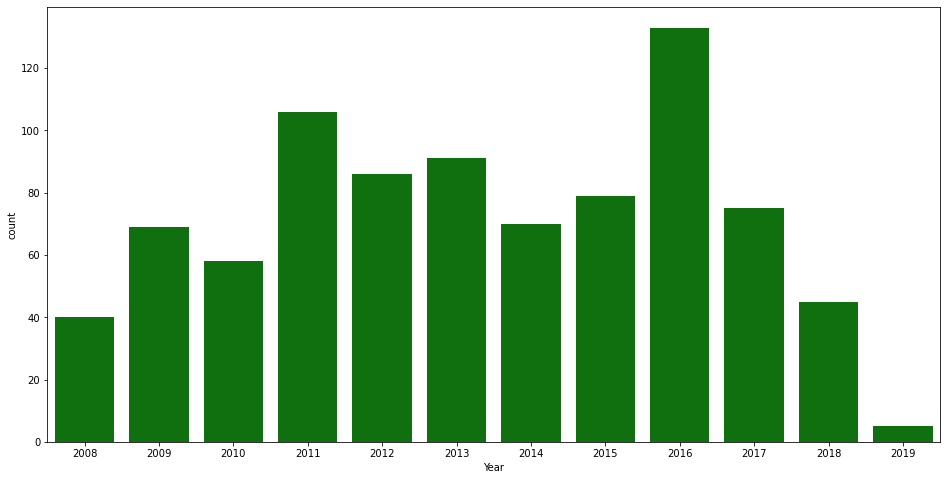

In [52]:
plt.figure(figsize=(16,8))
sns.countplot(x = 'Year', data=df, color = 'Green')

As we can see the most number of loans were taken in 2016 and the least number of loans were taken in 2019.

We can calculate loans given out per year by using groupby and taking sum as the aggregate function.

In [53]:
loan_per_year = df[['Year', 'Amount']].groupby('Year').sum()

In [54]:
loan_per_year

,Amount
Year,
2008,7565.0
2009,62400.0
2010,41235.0
2011,33949.0
2012,34886.0
2013,41852.0
2014,48391.0
2015,51104.0
2016,75001.0


We can plot the data in loan_per_year dataset which we have created simply using .plot method taking the amount on the Y-Axis and sum on the corresponding year on the X-Axis.

<AxesSubplot:xlabel='Year'>

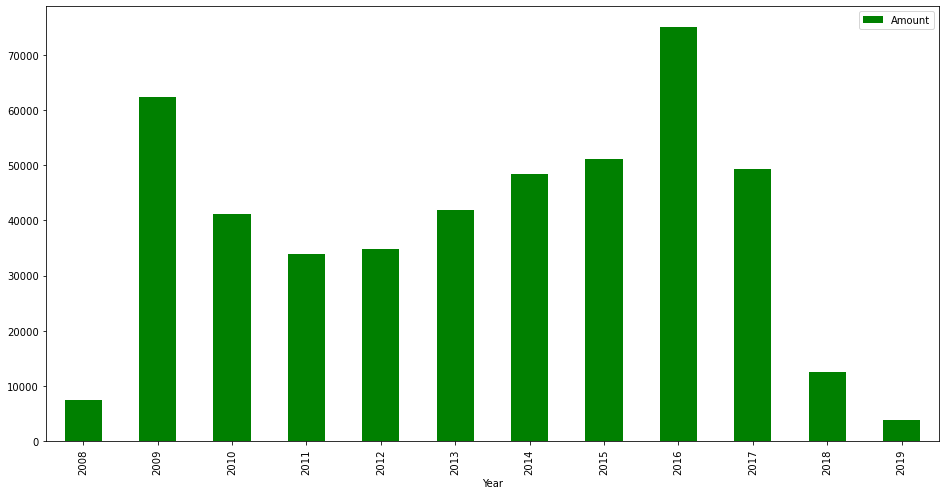

In [55]:
loan_per_year.plot(kind='bar', color='Green', figsize = (16,8))

The highest amount of loans were given in 2016 and the total of loans given that year exceeded 70 Billions.

From the number of loans graph we plotted above, we saw in 2009 only around 70 loans were given out but the total amount of loans given out exceeded 60 Billions.


Now that the visualisations for a year are done, let us do visualisations and draw inferences for countries.

For that we will have to use groupby and group with respect to countries. Let us take 2 aggregate functions, one for the sum of the loan amount and count for the number of loans taken.

In [56]:
loan_country = df[['Country', 'Amount']].groupby('Country').agg({'Amount':'sum', 'Country':'count'})

In [57]:
loan_country.head()

,Amount,Country
Country,,
Angola,29640.0,115
Antigua & Barbuda,128.0,2
Argentina,17083.0,11
Bahamas,99.0,2
Bangladesh,11089.0,17


There are 2 columns named country, one is the index column and the other column named 'Country' tells us the count for the number of loans taken.

Let us rename the column for counts.

In [58]:
loan_country.rename(columns = {'Country': 'Count'}, inplace = True)

In [59]:
loan_country.sort_values('Count', ascending = False).head(5)

,Amount,Count
Country,,
Angola,29640.0,115
Ethiopia,8291.0,34
Cambodia,5008.0,31
Sri Lanka,8709.0,30
Indonesia,14499.0,30


When we sort the values in loan_country dataset according to the count, we can see that Angola has taken the highest number of loans which is 115, followed by Ethiopia which has taken 34.

In [60]:
loan_country.sort_values('Amount', ascending = False).head(5)

,Amount,Count
Country,,
Venezuela,57691.0,16
Pakistan,39853.0,23
Russian Federation,37045.0,8
Angola,29640.0,115
Brazil,28156.0,10


Let us plot graphs for both the count of loans and for the sum of loans taken.

<AxesSubplot:ylabel='Country'>

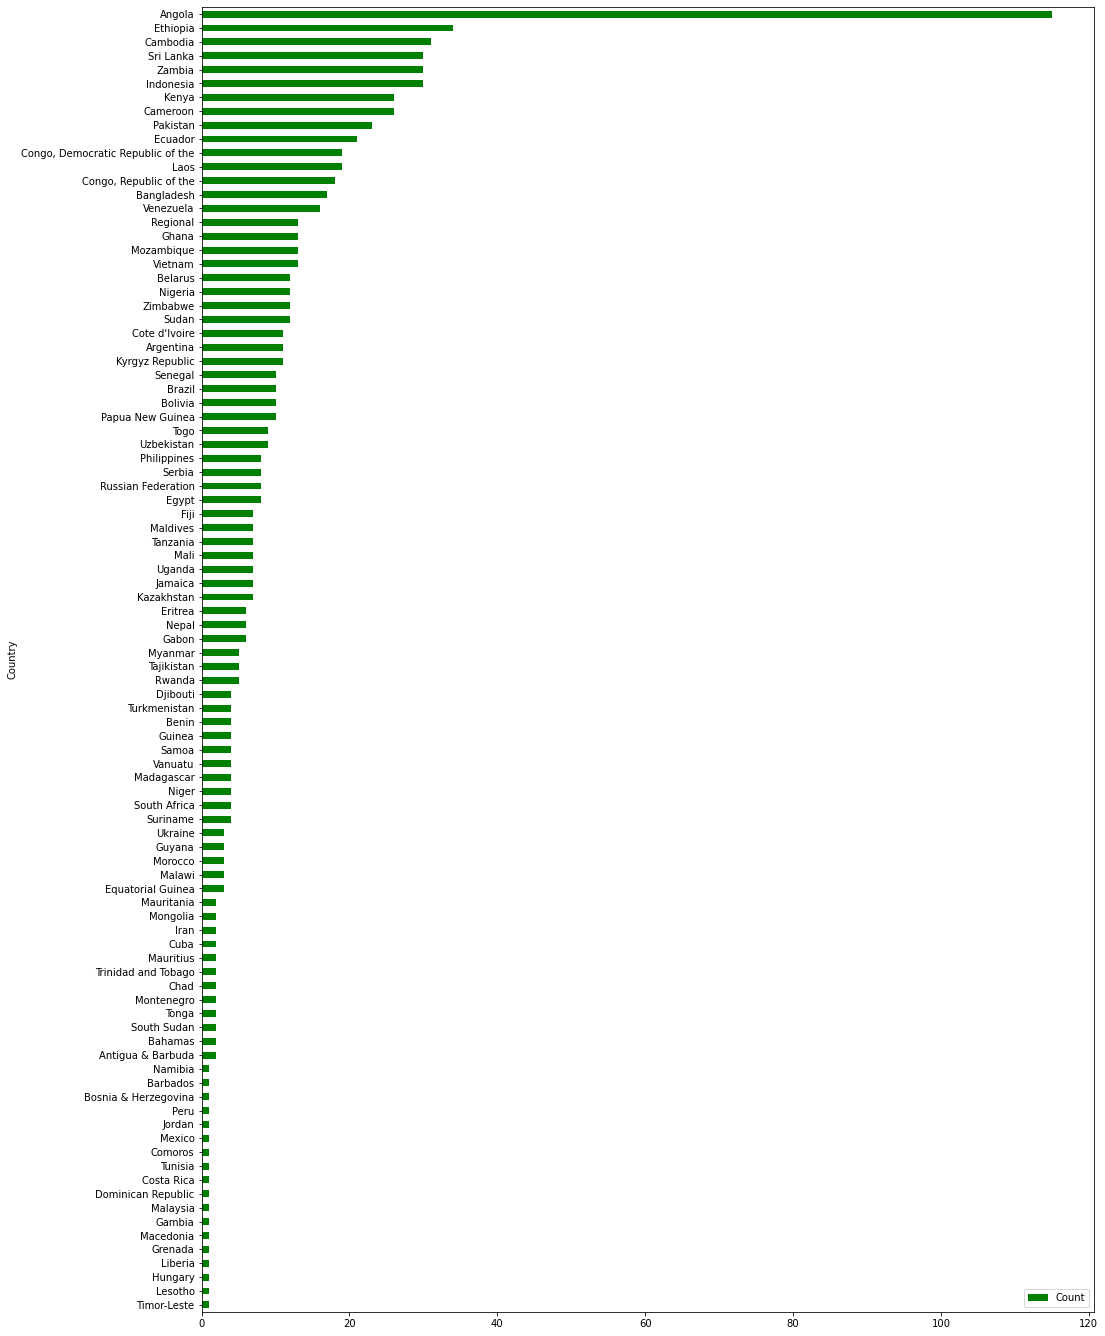

In [61]:
loan_country.sort_values('Count').plot(y = 'Count',kind = 'barh', figsize = (16,24), color = 'Green')

<AxesSubplot:ylabel='Country'>

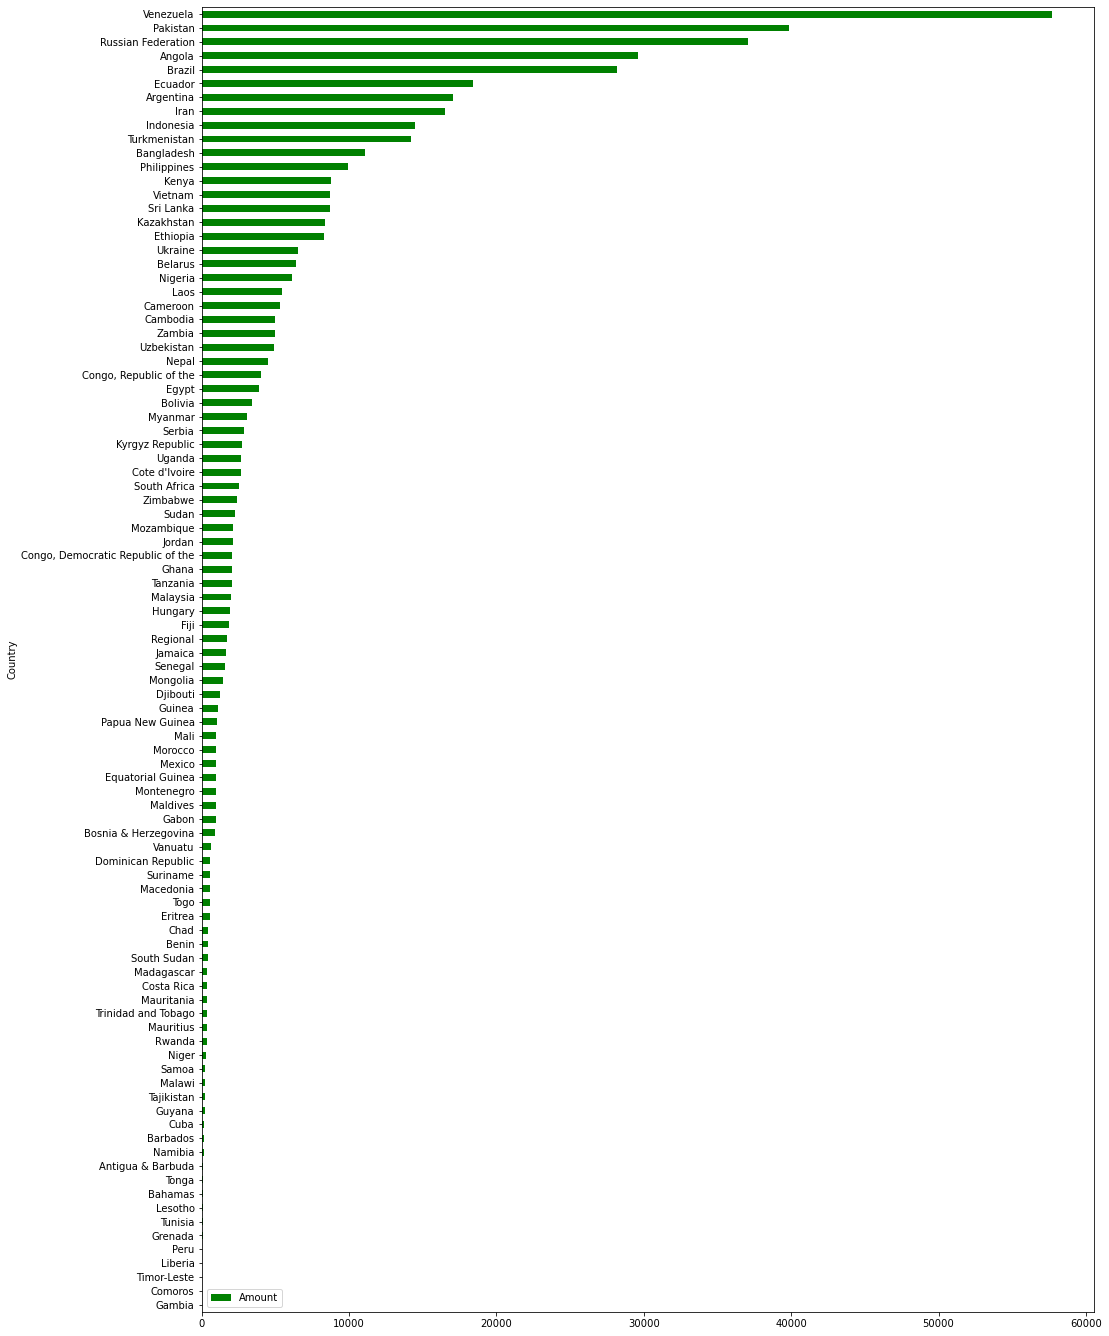

In [62]:
loan_country.sort_values('Amount', ascending = True).plot(y = 'Amount', kind = 'barh', figsize = (16,24), color = 'Green')

Next we have to draw inferences based on the 'Sector' column.
Let us first draw a pie chart to represent the loan percent according to sectors.

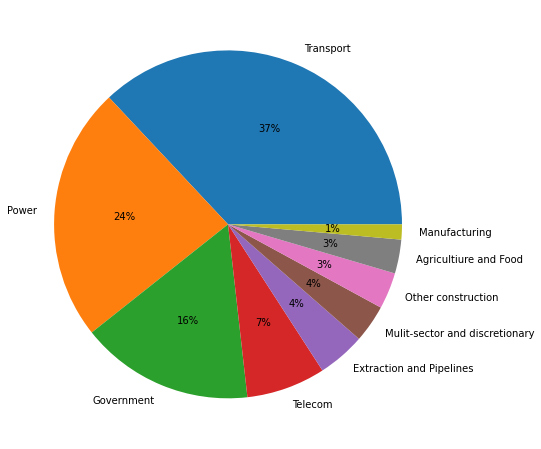

In [63]:
a = df['Sector'].value_counts()
plt.figure(figsize = (8,8))
plt.pie(x = a, data = df, labels= a.index,autopct='%.0f%%')
plt.show()

From the pie chart, we can see that the highest number of loans were taken for Transport sector that is 37% of the total loans.

Followed by power sector, and Government Sector which have a significant contribution of 24% and 16% respectively.

Other sector sectors have taken small number of loans as compared to top 3.

In [64]:
loan_per_sector = df[["Sector", "Amount"]].groupby("Sector").agg({'Amount':'sum', 'Sector':'count'})

In [65]:
loan_per_sector

,Amount,Sector
Sector,,
Agricultiure and Food,7526.0,27
Extraction and Pipelines,114187.0,38
Government,23120.0,138
Manufacturing,8747.0,12
Mulit-sector and discretionary,59156.0,30
Other construction,22613.0,29
Power,98534.0,203
Telecom,8061.0,63
Transport,120203.0,317


There are 2 columns named country, one is the index column and the other column named 'Sector' tells us the count for the number of loans taken.

Let us rename the column for counts.

In [66]:
loan_per_sector.rename(columns = {'Sector':'Count'}, inplace = True)

In [67]:
loan_per_sector.sort_values('Count', ascending = False)

,Amount,Count
Sector,,
Transport,120203.0,317
Power,98534.0,203
Government,23120.0,138
Telecom,8061.0,63
Extraction and Pipelines,114187.0,38
Mulit-sector and discretionary,59156.0,30
Other construction,22613.0,29
Agricultiure and Food,7526.0,27
Manufacturing,8747.0,12


In [68]:
loan_per_sector.sort_values('Amount', ascending = False)

,Amount,Count
Sector,,
Transport,120203.0,317
Extraction and Pipelines,114187.0,38
Power,98534.0,203
Mulit-sector and discretionary,59156.0,30
Government,23120.0,138
Other construction,22613.0,29
Manufacturing,8747.0,12
Telecom,8061.0,63
Agricultiure and Food,7526.0,27


Let us visualise this data by plotting it.

<AxesSubplot:ylabel='Sector'>

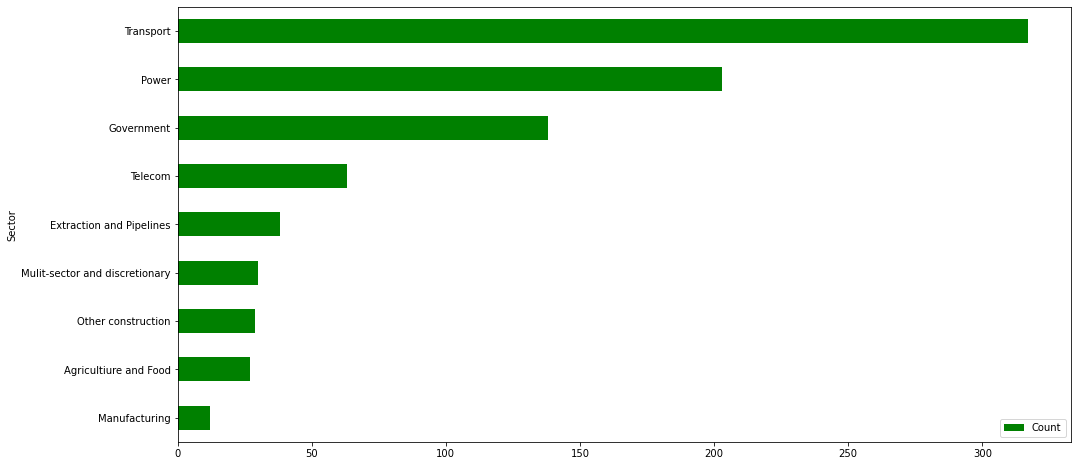

In [69]:
loan_per_sector.sort_values('Count', ascending = True).plot(y = 'Count',kind='barh', color = 'Green', figsize = (16,8))

<AxesSubplot:ylabel='Sector'>

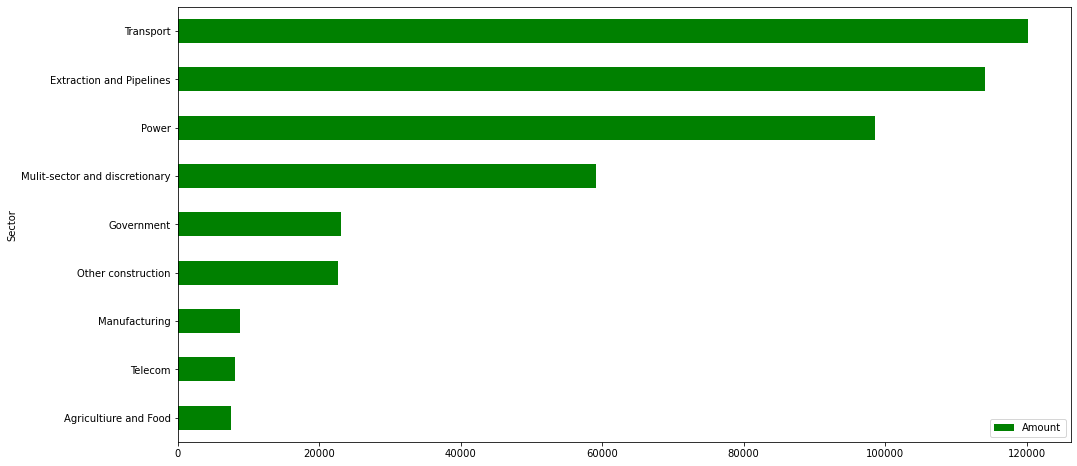

In [70]:
loan_per_sector.sort_values('Amount', ascending = True).plot(y = 'Amount',kind='barh', color = 'Green', figsize = (16,8))

In [71]:
loan_country_sector = df[['Country','Sector','Amount']].groupby(['Country', 'Sector']).sum('Amount')

loan_country_sector

Amount
Country  Sector                                 
Angola   Agricultiure and Food             893.0
         Extraction and Pipelines        17500.0
         Government                       1311.0
         Manufacturing                      83.0
         Mulit-sector and discretionary   2200.0
...                                          ...
Zambia   Transport                        2476.0
Zimbabwe Government                        341.0
         Power                            1318.0
         Telecom                           437.0
         Transport                         316.0

[273 rows x 1 columns]

In [72]:
loan_country_sector[['Amount']].sort_values('Amount', ascending = False).head(10)

,,Amount
Country,Sector,
Venezuela,Mulit-sector and discretionary,40500.0
Russian Federation,Extraction and Pipelines,27500.0
Brazil,Extraction and Pipelines,25000.0
Pakistan,Power,18406.0
Angola,Extraction and Pipelines,17500.0
Pakistan,Transport,16803.0
Venezuela,Extraction and Pipelines,15200.0
Iran,Other construction,15000.0
Turkmenistan,Extraction and Pipelines,14200.0


Let us plot what percent of total loans are given by a particular bank.

In [73]:
print(sum(df['Lender_Others']), sum(df['Lender_CDB']),sum(df['Lender_Eximbank']))

5 232 634


Text(0.5, 1.0, 'Lender Eximbank')

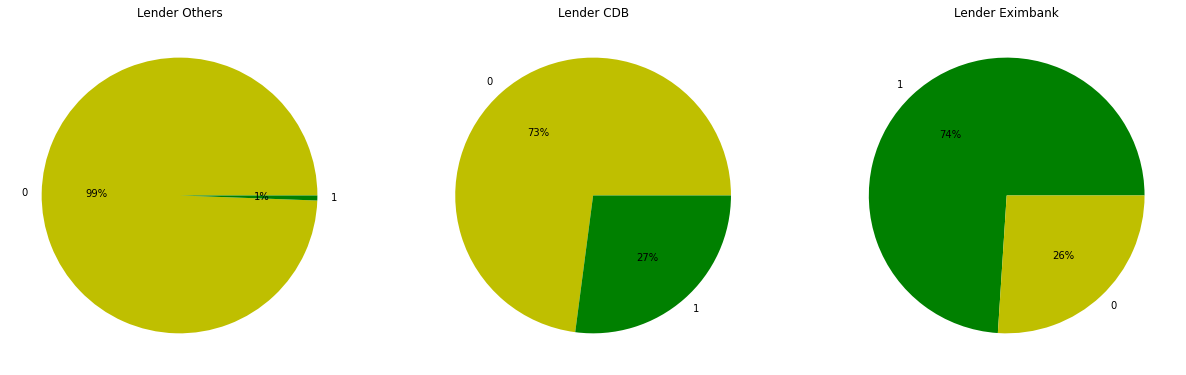

In [74]:
plt.figure(figsize = (21,12))

c = df['Lender_Others'].value_counts()
plt.subplot(1,3,1)
plt.pie(x = c, data = df, labels = c.index, colors = ['y','Green'],autopct='%.0f%%')
plt.title('Lender Others')

c = df['Lender_CDB'].value_counts()
plt.subplot(1,3,2)
plt.pie(x = c, data = df, labels = c.index, colors = ['y','Green'],autopct='%.0f%%')
plt.title('Lender CDB')

c = df['Lender_Eximbank'].value_counts()
plt.subplot(1,3,3)
plt.pie(x = c, data = df, labels = c.index, colors = ['Green','y'],autopct='%.0f%%')
plt.title('Lender Eximbank')

CDB lender has contributed in 27% of the total number of loans given.

Eximbank lender has contributed in almost 75% of the total number of loans given.

Other lenders have given out very less number of loans.

Let us find out the relation between the number of loans given out by a bank and the sum of the amount the bank has given out loans.

In [75]:
loan_Eximbank = df[['Lender_Eximbank','Amount']].groupby('Lender_Eximbank').agg({'Amount':'sum','Lender_Eximbank':'count'})
loan_Eximbank

,Amount,Lender_Eximbank
Lender_Eximbank,,
0,247198.0,223
1,214949.0,634


In [76]:
loan_Eximbank.rename(columns = {'Lender_Eximbank':'Count'},inplace = True)
loan_Eximbank

,Amount,Count
Lender_Eximbank,,
0,247198.0,223
1,214949.0,634


In [77]:
loan_CDB = df[['Lender_CDB','Amount']].groupby('Lender_CDB').agg({'Amount':'sum','Lender_CDB':'count'})
loan_CDB

,Amount,Lender_CDB
Lender_CDB,,
0,202309.0,625
1,259838.0,232


In [78]:
loan_CDB.rename(columns = {'Lender_CDB':'Count'},inplace = True)
loan_CDB

,Amount,Count
Lender_CDB,,
0,202309.0,625
1,259838.0,232


In [79]:
loan_Others = df[['Lender_Others','Amount']].groupby('Lender_Others').agg({'Amount':'sum','Lender_Others':'count'})
loan_Others

,Amount,Lender_Others
Lender_Others,,
0,447884.0,852
1,14263.0,5


In [80]:
loan_Others.rename(columns = {'Lender_Others':'Count'},inplace = True)
loan_Others

,Amount,Count
Lender_Others,,
0,447884.0,852
1,14263.0,5


Now that we have all the information we need, let us create a dataframe from it.

In [81]:
bank_amount = [['Eximbank', loan_Eximbank.loc[1,'Amount'],loan_Eximbank.loc[1,'Count']], 
               ['CDB', loan_CDB.loc[1,'Amount'],loan_CDB.loc[1,'Count']], 
               ['Others',loan_Others.loc[1,'Amount'], loan_Others.loc[1,'Count']]]
bank_amount

[['Eximbank', 214949.0, 634], ['CDB', 259838.0, 232], ['Others', 14263.0, 5]]

In [82]:
bank_data = pd.DataFrame(bank_amount, columns = ['Bank_name', 'Total_loan_amount', 'Number_of_loans'])
bank_data.set_index('Bank_name',inplace = True)
bank_data

,Total_loan_amount,Number_of_loans
Bank_name,,
Eximbank,214949.0,634
CDB,259838.0,232
Others,14263.0,5


Now we have a dataframe and we can use this dataframe to plot graphs to find out the relation between the sum of amount of loans and number of loans.

Text(0, 0.5, 'Total Loan Amount(in Millions)')

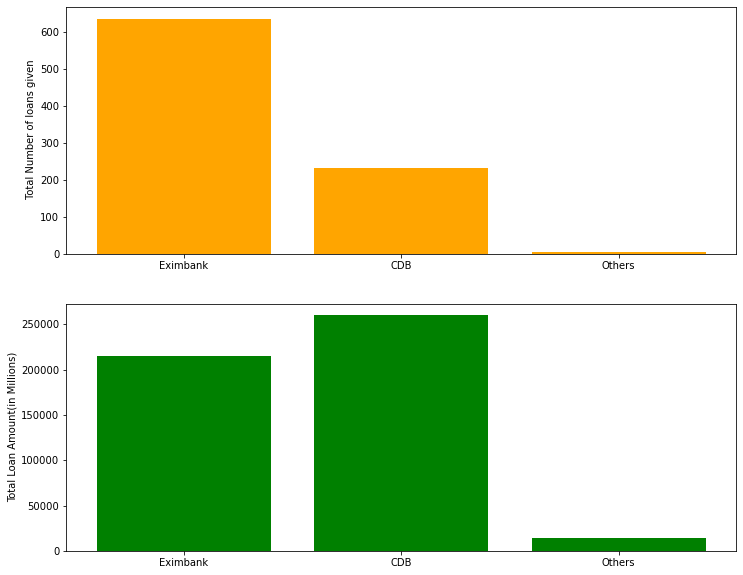

In [83]:
plt.figure(figsize = (12, 10))

plt.subplot(2,1,1)
plt.bar(x = bank_data.index, height = bank_data['Number_of_loans'], color = 'Orange')
plt.ylabel(' Total Number of loans given')

plt.subplot(2,1,2)
plt.bar(x = bank_data.index,height = bank_data['Total_loan_amount'], color = 'Green')
plt.ylabel('Total Loan Amount(in Millions)')

Let us visualize the data for Sensitive Territory Overlap.

Text(0.5, 1.0, 'Sensitive Territory - National')

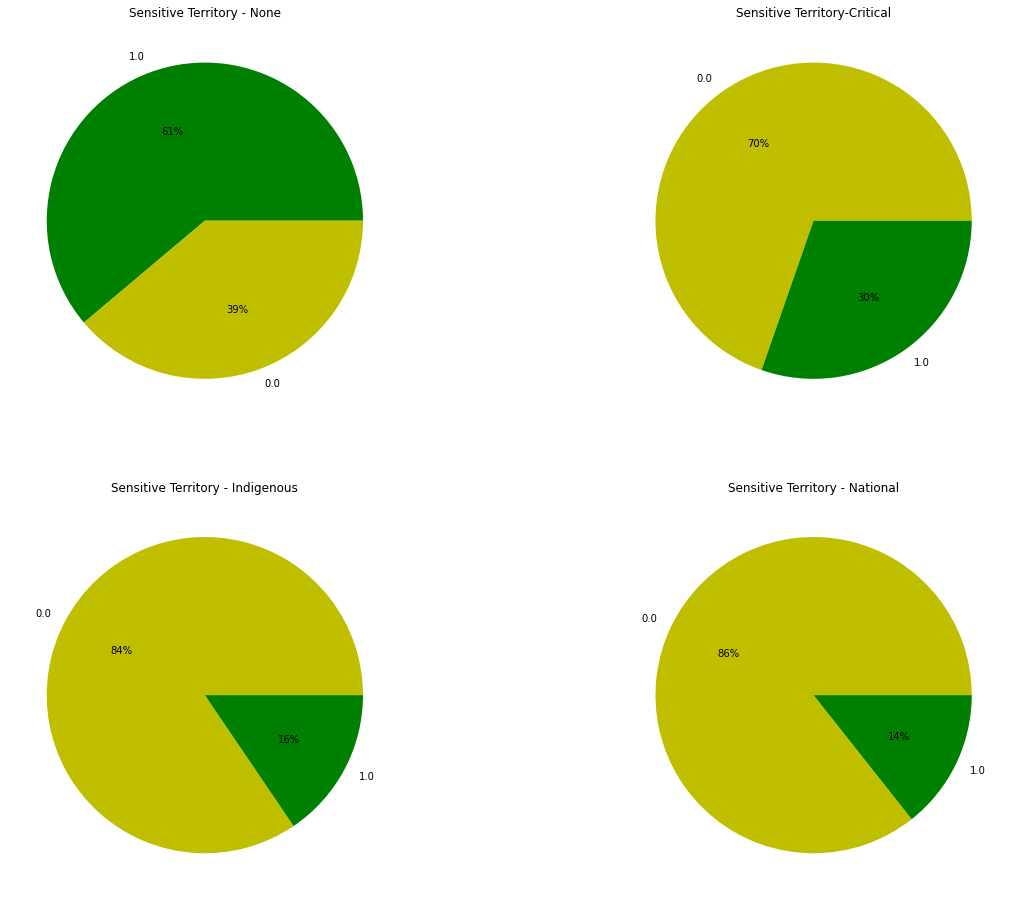

In [84]:
plt.figure(figsize=(20,16))

a1 = df['ST_None'].value_counts()
plt.subplot(2,2,1)
plt.pie(x = a1, data = df, labels = a1.index, colors = ['Green','y'],autopct='%.0f%%')
plt.title('Sensitive Territory - None')

a2 = df['ST_Critical'].value_counts()
plt.subplot(2,2,2)
plt.pie(x = a2, data = df, labels = a2.index, colors = ['y','Green'],autopct='%.0f%%')
plt.title('Sensitive Territory-Critical')

a3 = df['ST_Indigenous'].value_counts()
plt.subplot(2,2,3)
plt.pie(x = a3, data = df, labels = a3.index, colors = ['y','Green'],autopct='%.0f%%')
plt.title('Sensitive Territory - Indigenous')

a4 = df['ST_National'].value_counts()
plt.subplot(2,2,4)
plt.pie(x = a4, data = df, labels = a4.index, colors = ['y','Green'],autopct='%.0f%%')
plt.title('Sensitive Territory - National')

Let's plot the pie chart for borrower column

Text(0.5, 1.0, "If the borrower is country's government")

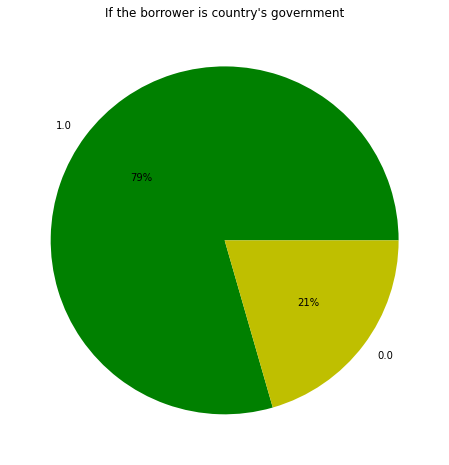

In [85]:
plt.figure(figsize=(8,8))
b = df['Borrower_Gov'].value_counts()
plt.pie(x = b, data = df, labels = b.index, colors = ['Green','y'],autopct='%.0f%%')
plt.title("If the borrower is country's government")

79% of the total loans were taken by some country's Government. That is a high percent.

We can say that Chinese banks grant high percent of loans to country's Governments.